#### The purpose of a book recommendation system is to predict buyer’s interest and recommend books to them accordingly. A book recommendation system can take into account many parameters like book content and book quality by filtering user reviews.

### Data Import and Initial Preparation
This cell loads the `books.csv` dataset into a DataFrame. The `on_bad_lines='skip'` parameter skips any malformed lines in the CSV file.

In [3]:
#Importing the necessary libraries to create the recommendation system
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


#reading into the dataset from downloads and printing out the firt 5 rows
df = pd.read_csv("Downloads/archive (2)/books.csv",on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
#checking for null values along the columns
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

There are no null values present in the dataset

In [6]:
#basic statistics along columns
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


From the results above, It can be seen that the `average_rating` are all between 0 and 5.

<Axes: xlabel='average_rating', ylabel='title'>

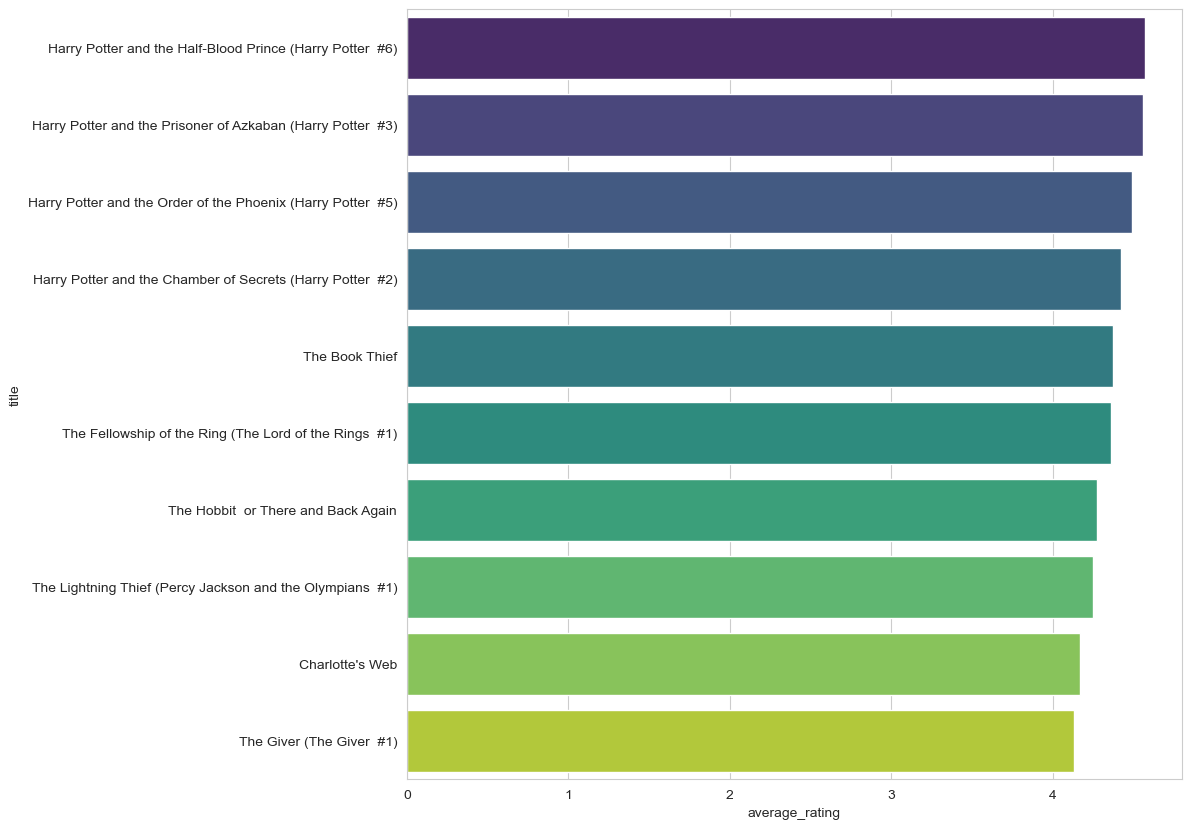

In [8]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='viridis')

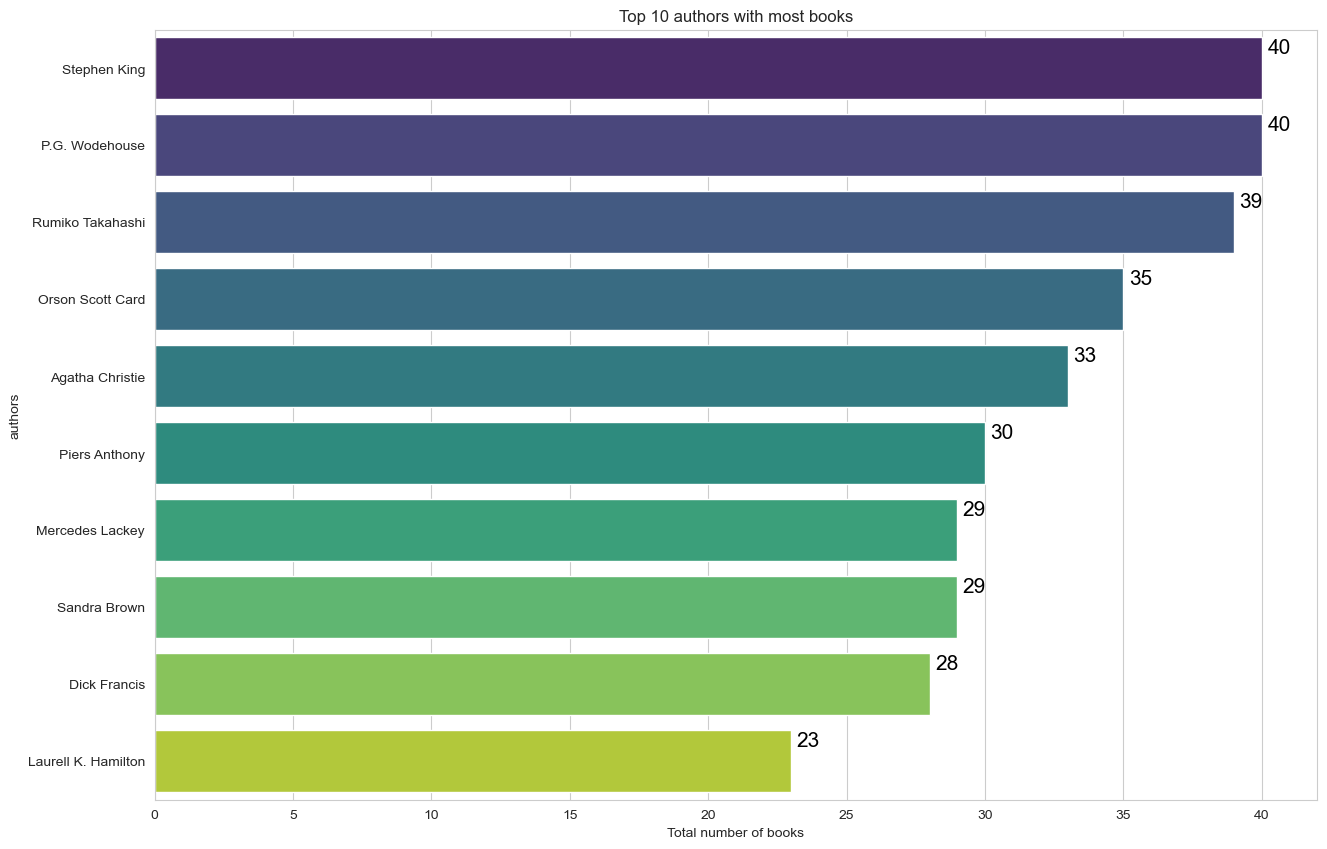

In [9]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x = most_books['title'], y = most_books.index, data=data, palette='viridis')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

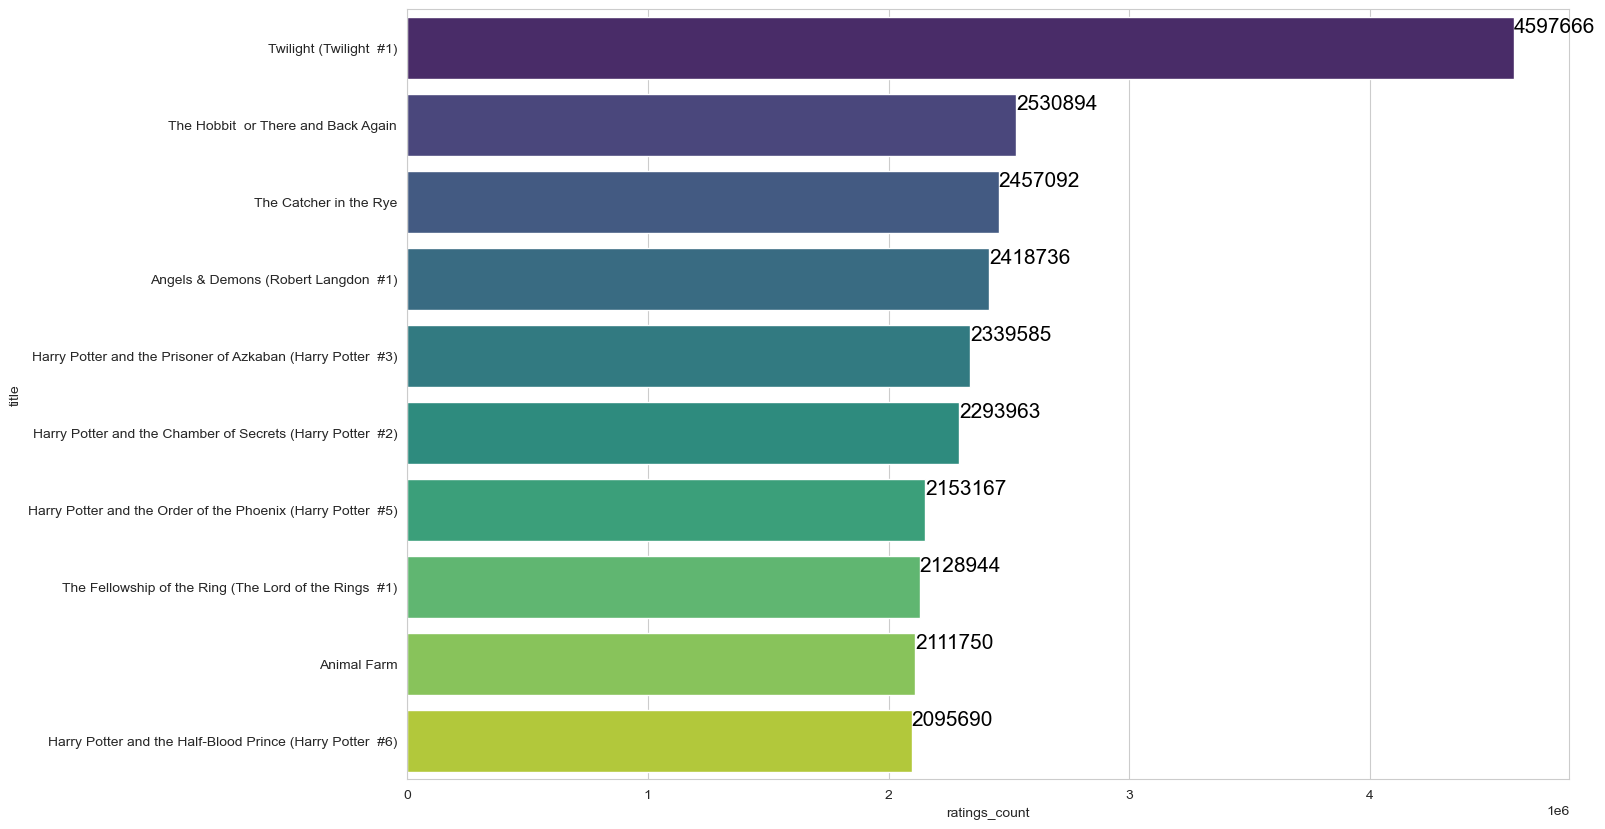

In [10]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_rated['ratings_count'],y= most_rated.index, data=data, palette = 'viridis')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Text(0.5, 0, 'Average rating')

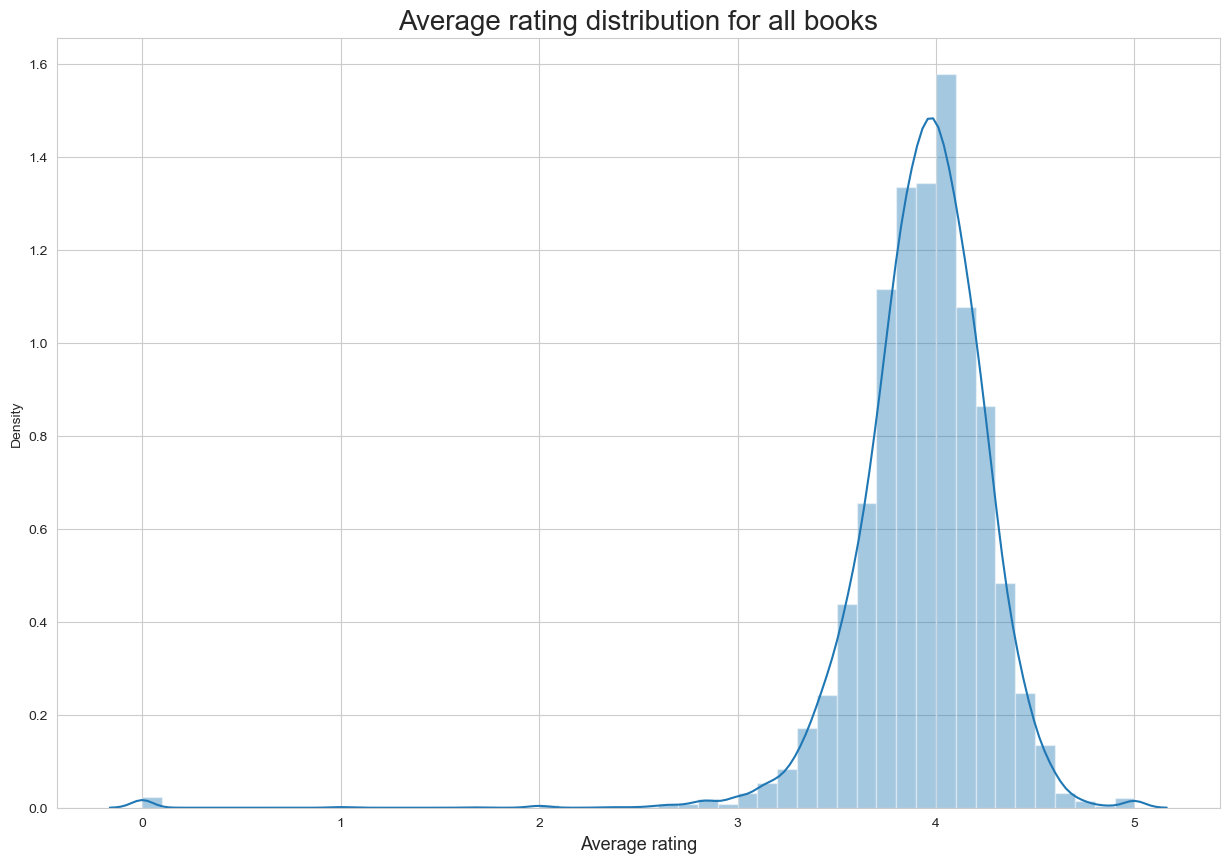

In [11]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

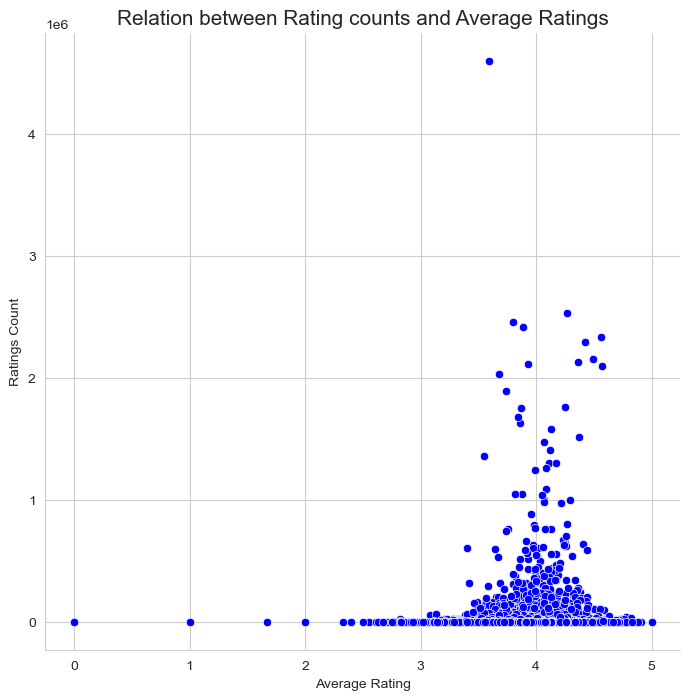

In [12]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'blue', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

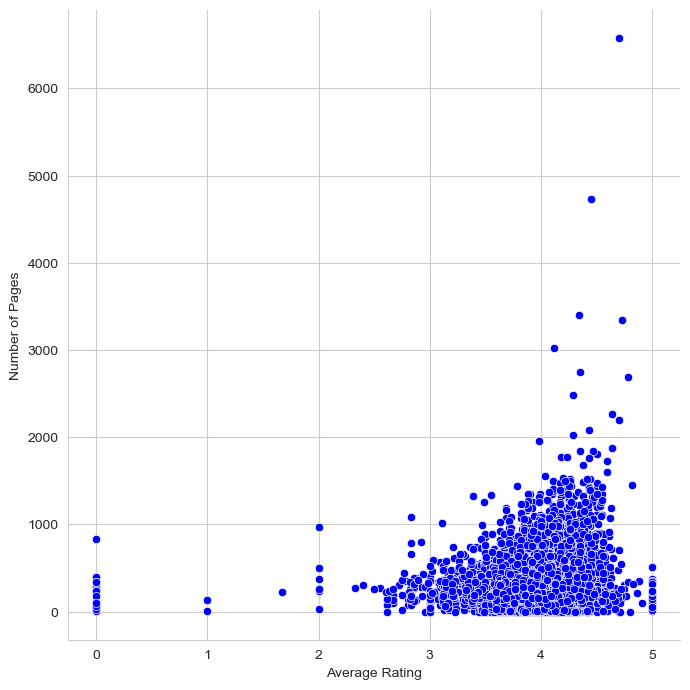

In [13]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'blue',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [14]:
df2 = df.copy()

df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

### Feature Encoding
The selected features (`rating_between`, `language_code`) are one-hot encoded using `pd.get_dummies()` to convert categorical text data into numeric format. This is necessary for the Nearest Neighbors algorithm, which works on numerical inputs.


In [16]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [17]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [18]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

### Model Training: Nearest Neighbors
This section initializes and trains a K-Nearest Neighbors model to find similar books based on the encoded features.  
- `n_neighbors=6` means it will find 5 similar books + 1 self-match.  
- `ball_tree` is an efficient algorithm for neighbor search on structured data.

In [20]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

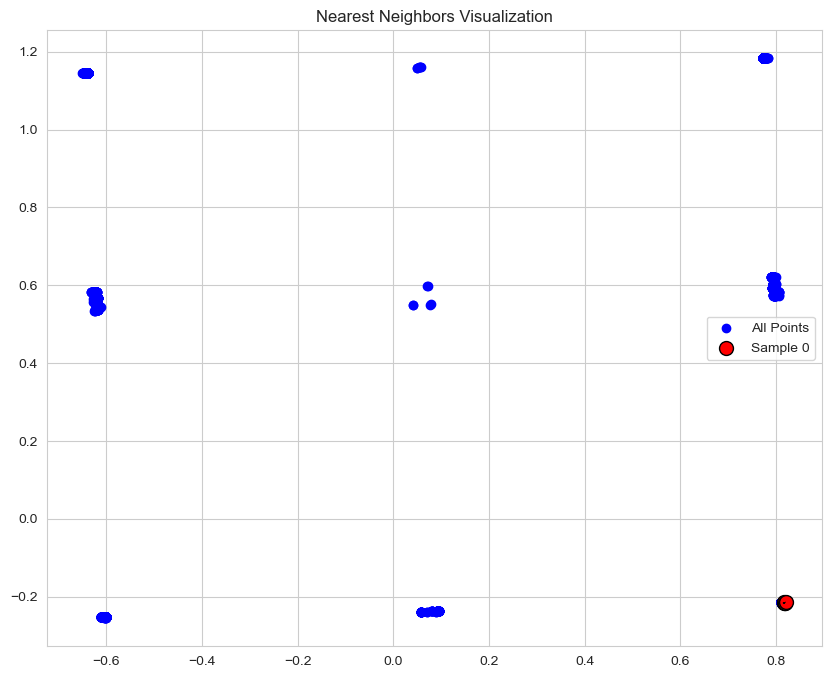

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Reduce to 2D
try:
    features_2d
except NameError:
    features_2d = features

plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c='blue', label='All Points')

# Draw connections to neighbors for first 5 samples
for i in range(5):
    for j in idlist[i][1:]:  # Skip self (first index)
        x_values = [features_2d[i, 0], features_2d[j, 0]]
        y_values = [features_2d[i, 1], features_2d[j, 1]]
        plt.plot(x_values, y_values, 'k--', linewidth=0.7)

    # Highlight the point
    plt.scatter(features_2d[i, 0], features_2d[i, 1], c='red', s=100, edgecolors='black', label=f'Sample {i}' if i == 0 else "")

plt.title('Nearest Neighbors Visualization')
plt.legend()
plt.grid(True)
plt.show()


### Book Recommendation Function
This function returns the top 5 book recommendations based on the title provided:
- Case-insensitive title matching using `.str.lower()`
- Uses the `idlist` from the Nearest Neighbors model to find similar books
- Returns a list of recommended book titles

In [23]:
def BookRecommender(book_name):
    book_list_name = []
    book_name_lower = book_name.lower()
    matched_books = df2[df2['title'].str.lower() == book_name_lower]
    
    if matched_books.empty:
        return ["Book not found."]
    
    book_id = matched_books.index[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

### Test Recommendation Output
Example usage of the `BookRecommender` function to get recommendations for the book titled *untouchable*. This outputs similar titles based on metadata similarity.

In [25]:
BookNames = BookRecommender('untouchable')
BookNames

['Untouchable',
 'Deception Point',
 'The Book of Evidence (The Freddie Montgomery Trilogy #1)',
 'The Worm Ouroboros',
 'Them (Wonderland Quartet  #3)',
 'Why Is Sex Fun? The Evolution of Human Sexuality (Science Masters)']